# Import the necessary libraries

In [2]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=7,6
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the Dataframe

In [3]:
#Create the dataframe 'iris'

iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#checking the number of rows and columns of the dataframe

iris.shape

(150, 6)

There are 150 rows and 6 columns in the dataframe

In [5]:
#List any 5 random rows from the dataset

iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
131,132,7.9,3.8,6.4,2.0,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor


In [6]:
#list the first 5 rows of the dataframe

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#list the last 5 rows of the dataframe

iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#checking the datatypes of all the columns in the dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
#finding all the statistics measures of the dataframe

iris.describe().style.background_gradient()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


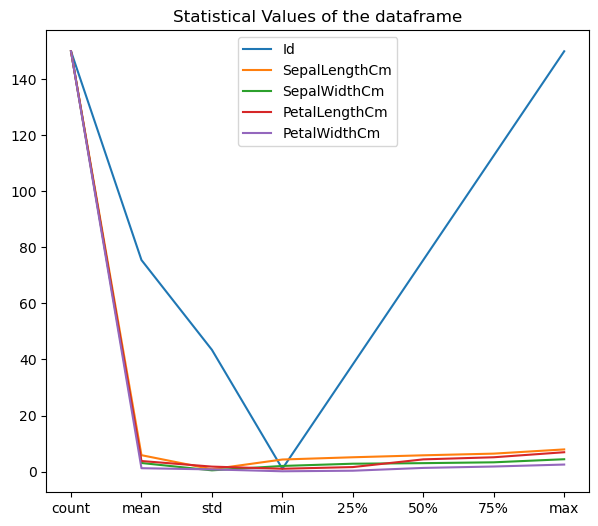

In [10]:
#Plotting the statistical values in a plot

iris.describe().plot()
plt.title('Statistical Values of the dataframe')
plt.show()

In [11]:
#Checking for the null values of the dataframe

iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataframe

In [12]:
#Drop the columns that are not necessary for training the model

iris=iris.drop(['Id'],axis='columns')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

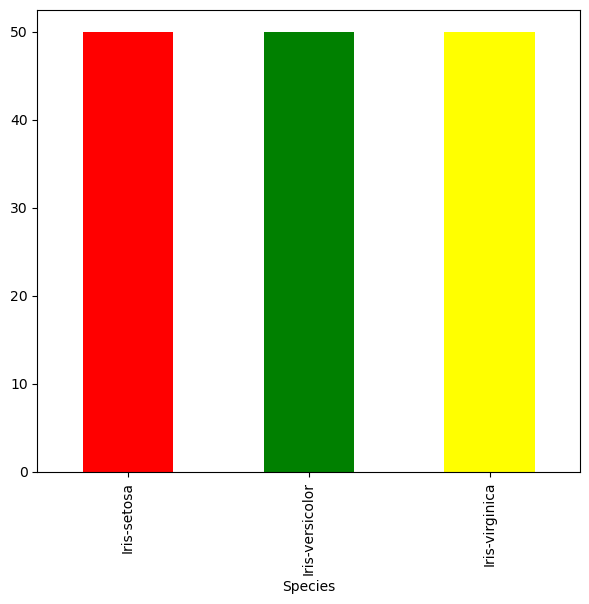

In [13]:
#Plot the distribution of different species using barplot

colors=['red','green','yellow']
iris['Species'].value_counts().plot(kind='bar',color=colors)
plt.show()

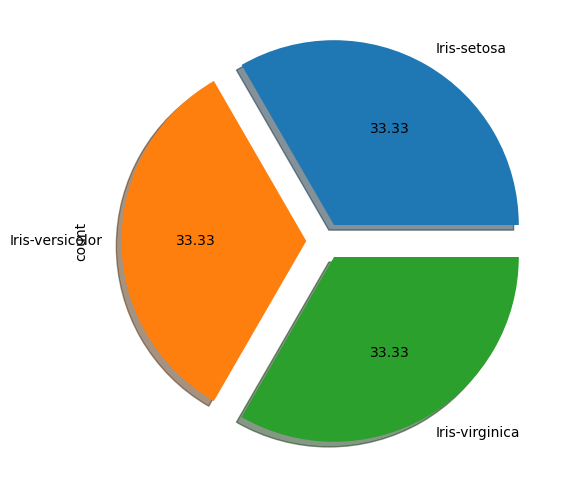

In [14]:
iris['Species'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,explode=(0.1,0.1,0.1))
plt.show()

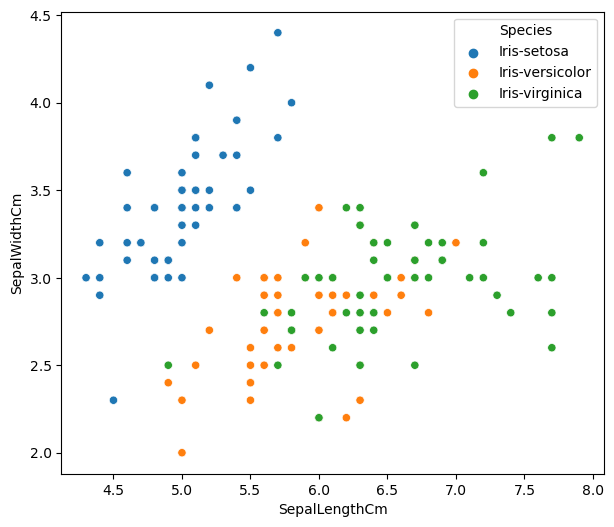

In [15]:
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm",hue="Species")
plt.show()

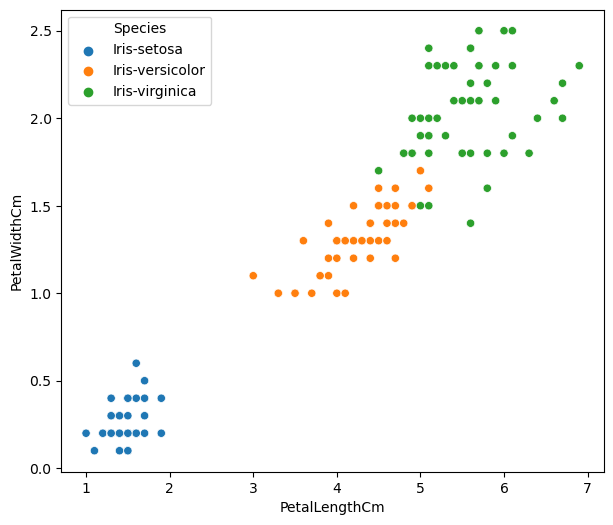

In [16]:
sns.scatterplot(data=iris, x="PetalLengthCm", y="PetalWidthCm",hue="Species")
plt.show()

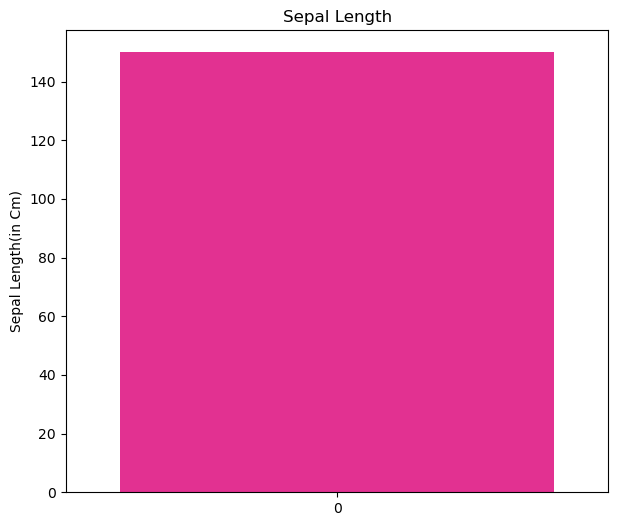

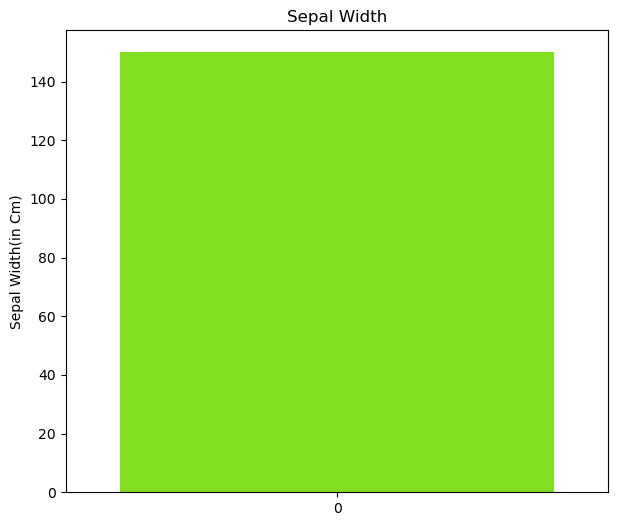

In [17]:
sns.countplot(iris['SepalLengthCm'],color='#FF1493')
plt.ylabel('Sepal Length(in Cm)')
plt.title('Sepal Length')
plt.show()
sns.countplot(iris['SepalWidthCm'],color='#80FF00')
plt.title('Sepal Width')
plt.ylabel('Sepal Width(in Cm)')
plt.show()


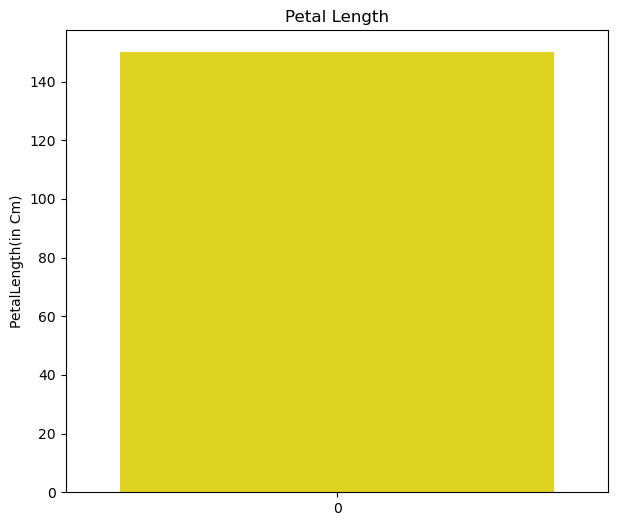

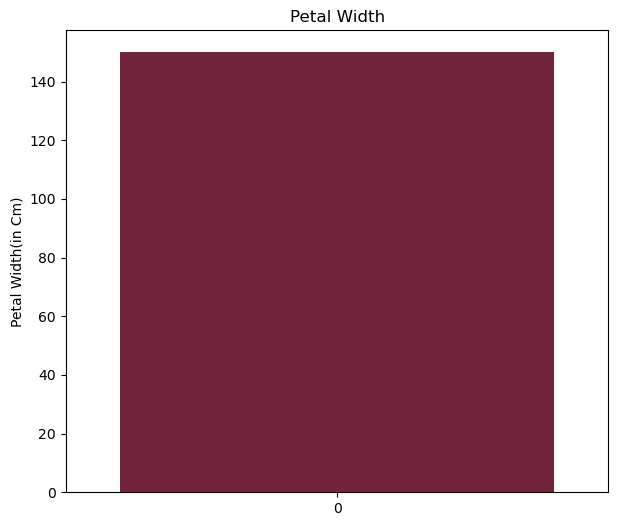

In [18]:
sns.countplot(iris['PetalLengthCm'],color='#FDEE00')
plt.ylabel('PetalLength(in Cm)')
plt.title('Petal Length')
plt.show()
sns.countplot(iris['PetalWidthCm'],color='#7F1734')
plt.title('Petal Width')
plt.ylabel('Petal Width(in Cm)')
plt.show()

Checking for Outliers

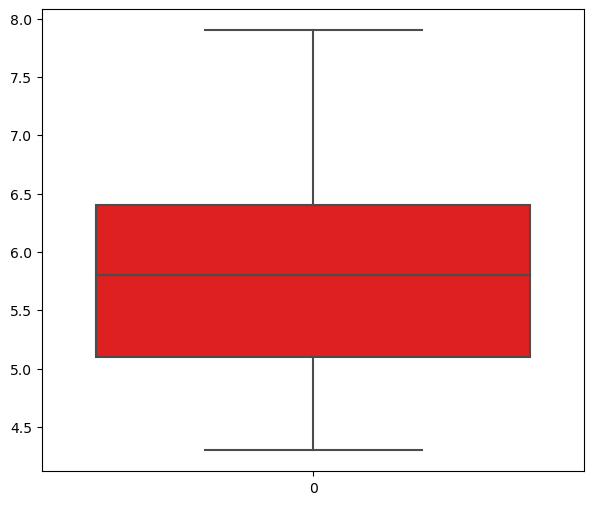

In [19]:
sns.boxplot(iris['SepalLengthCm'],color='#FF0000')
plt.show()

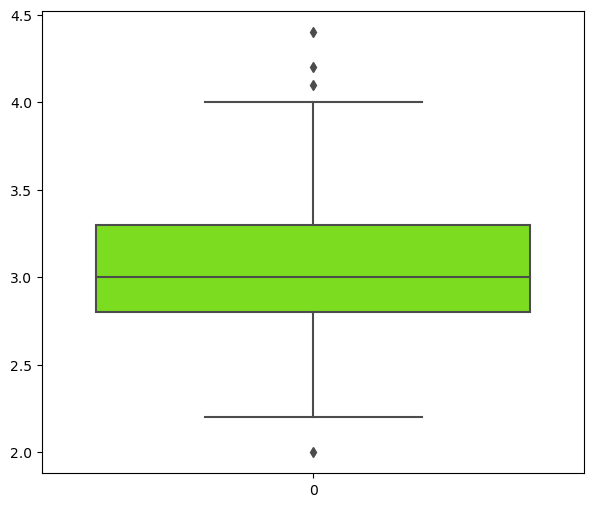

In [20]:
sns.boxplot(iris['SepalWidthCm'],color='#7CFC00')
plt.show()

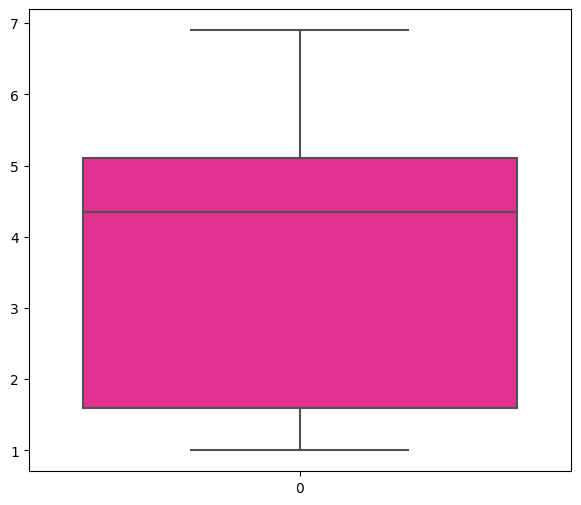

In [21]:
sns.boxplot(iris['PetalLengthCm'],color='#FF1493')
plt.show()

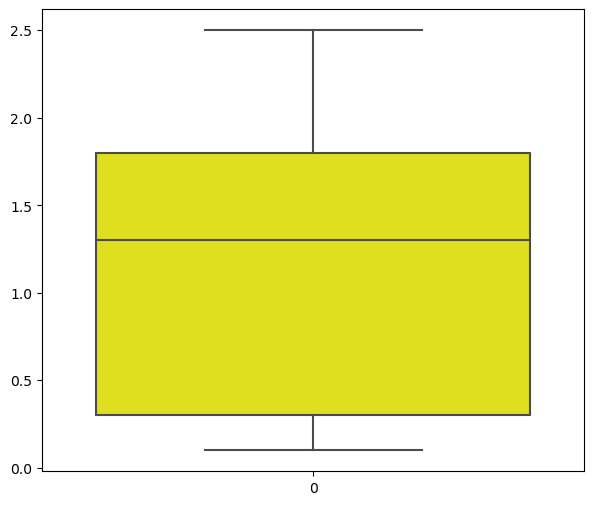

In [22]:
sns.boxplot(iris['PetalWidthCm'],color='#FFFF00')
plt.show()

# Feature Engineering 

Checking for skewness

In [23]:
iris['SepalLengthCm'].skew()

0.3149109566369728

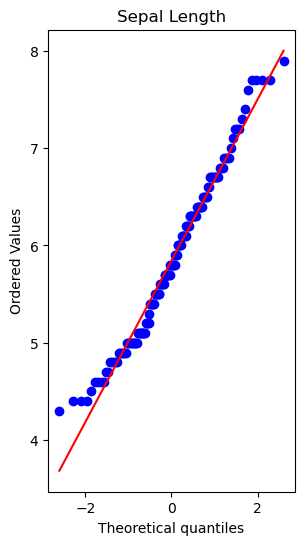

In [24]:
plt.subplot(121)
stats.probplot(iris['SepalLengthCm'],dist="norm",plot=plt)
plt.title('Sepal Length')
plt.show()

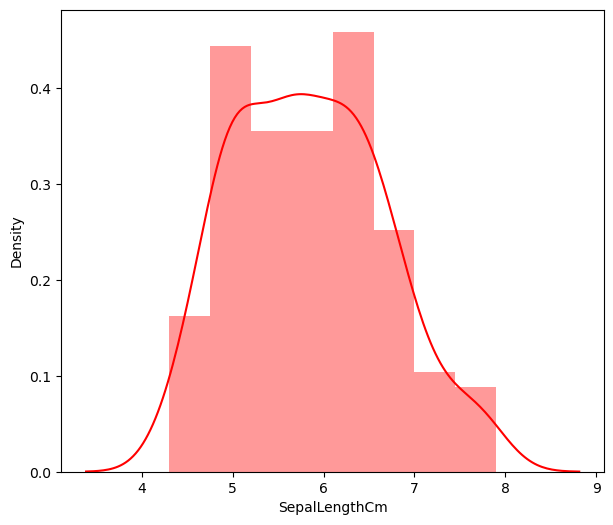

In [25]:
sns.distplot(iris['SepalLengthCm'],color='red')
plt.show()

In [26]:
iris['SepalWidthCm'].skew()

0.3340526621720866

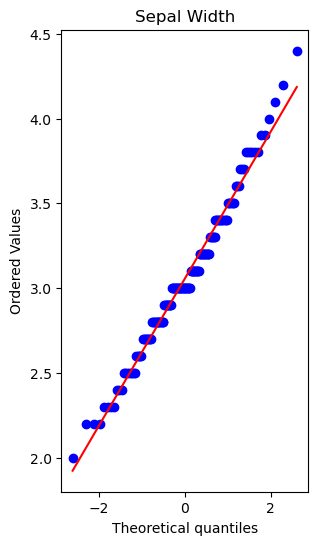

In [27]:
plt.subplot(121)
stats.probplot(iris['SepalWidthCm'],dist="norm",plot=plt)
plt.title('Sepal Width')
plt.show()

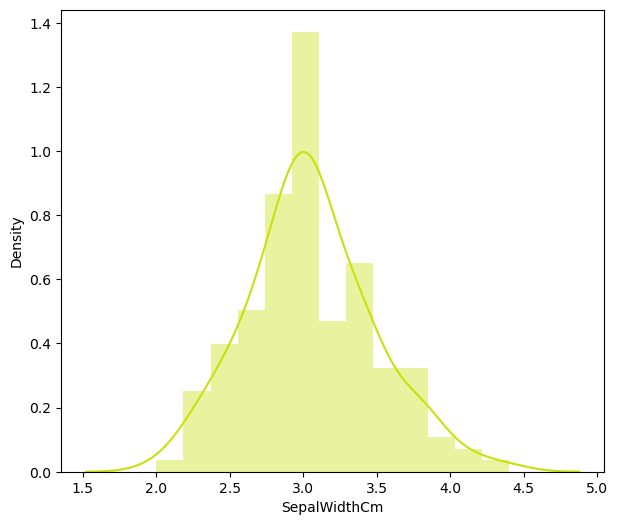

In [28]:
sns.distplot(iris['SepalWidthCm'],color='#CAE00D')
plt.show()

In [29]:
iris['PetalLengthCm'].skew()

-0.27446425247378287

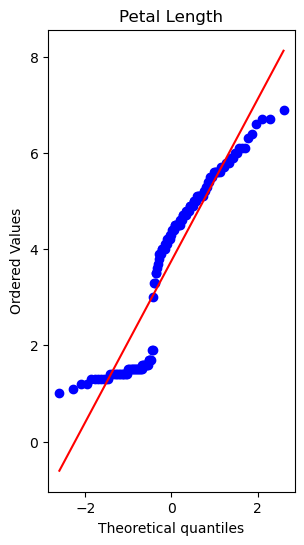

In [30]:
plt.subplot(121)
stats.probplot(iris['PetalLengthCm'],dist="norm",plot=plt)
plt.title('Petal Length')
plt.show()

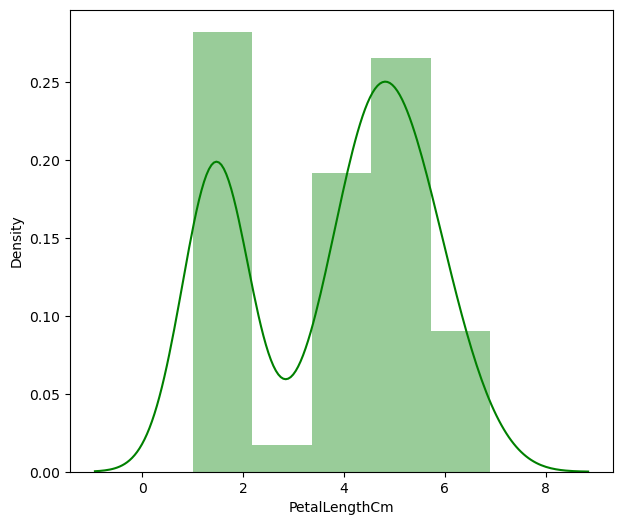

In [31]:
sns.distplot(iris['PetalLengthCm'],color='green')
plt.show()

In [32]:
iris['PetalWidthCm'].skew()

-0.10499656214412734

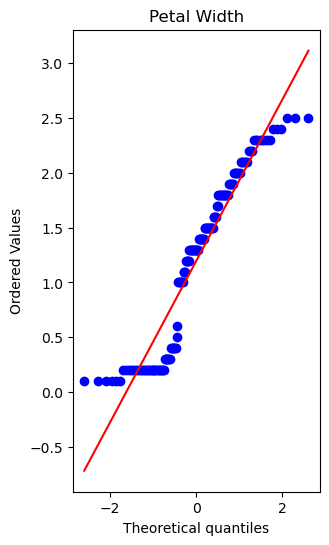

In [33]:
plt.subplot(121)
stats.probplot(iris['PetalWidthCm'],dist="norm",plot=plt)
plt.title('Petal Width')
plt.show()

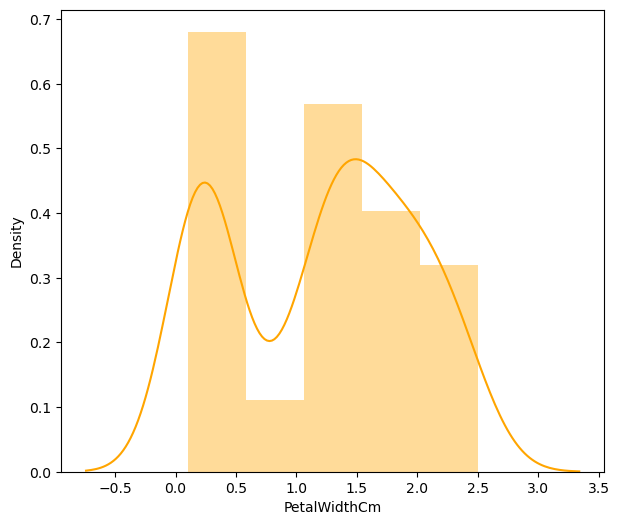

In [34]:
sns.distplot(iris['PetalWidthCm'],color='orange')
plt.show()

Checking correlation between parameters

In [35]:
sns.set()

In [58]:
X_train.corr().style.background_gradient()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.052819,0.864970,0.808314
SepalWidthCm,-0.052819,1.000000,-0.378240,-0.317901
PetalLengthCm,0.864970,-0.378240,1.000000,0.960310
PetalWidthCm,0.808314,-0.317901,0.960310,1.000000


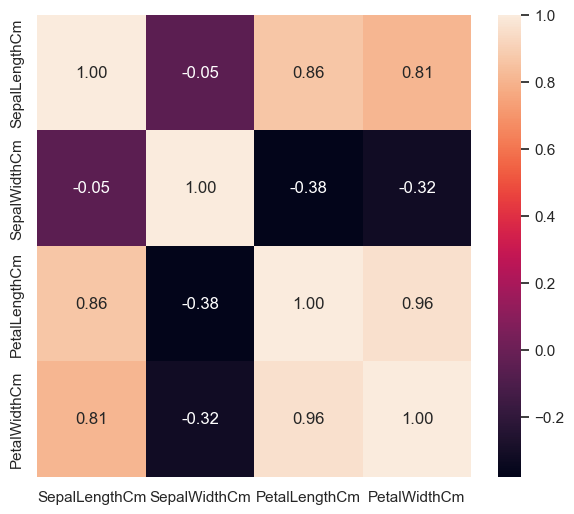

In [59]:
correlations=X_train.corr()
sns.heatmap(correlations,annot=True,fmt='0.2f')
plt.show()

# Model Training

In [39]:
X=iris.drop(['Species'],axis='columns')
Y=iris['Species']

In [40]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
#Replacing the categorical values with numerical values

Y.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[1,2,3],inplace=True)

In [42]:
#Model training

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [43]:
##GaussianNB model


gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

##checking the accuracy

ac=accuracy_score(y_test,y_pred)
ac

0.9666666666666667

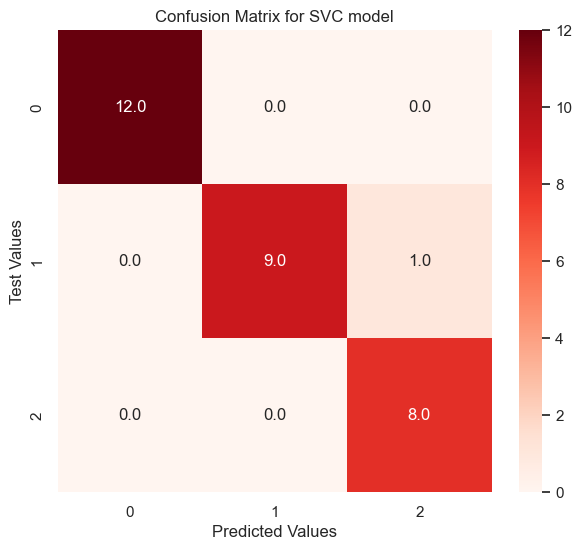

In [44]:
##confusion matrix

matrix=metrics.confusion_matrix(y_pred,y_test)
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Reds',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for SVC model")
plt.show()

In [45]:
##SVC 

sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
##checking the accuracy

ac=accuracy_score(y_test,y_pred)
ac

1.0

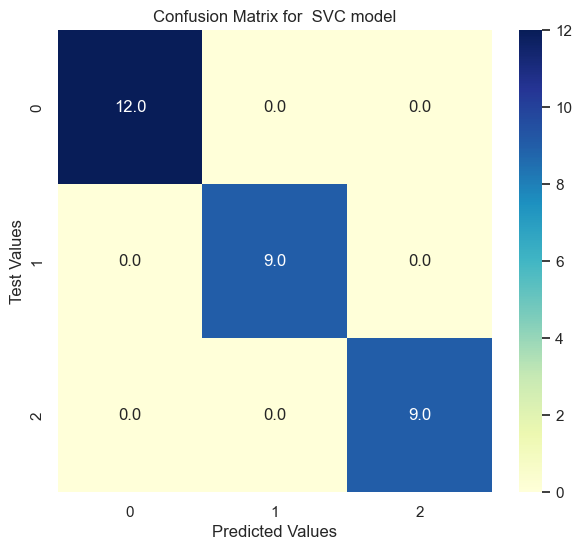

In [46]:
##confusion matrix

matrix=metrics.confusion_matrix(y_pred,y_test)
matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='YlGnBu',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for  SVC model")
plt.show()

In [47]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9666666666666667

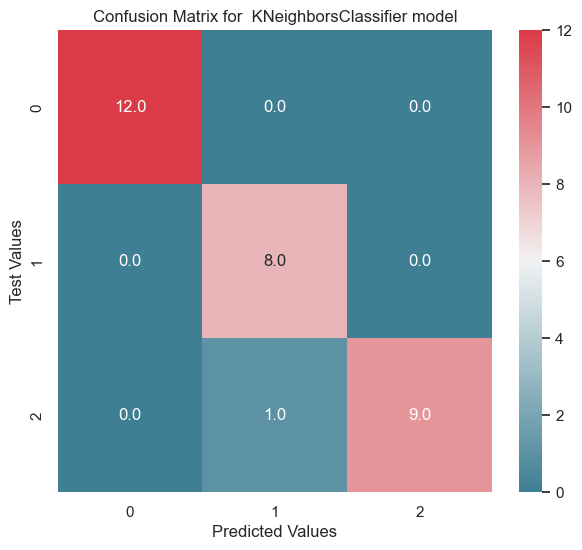

In [48]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(matrix,annot=True,cmap=cmap,fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for  KNeighborsClassifier model")
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9666666666666667

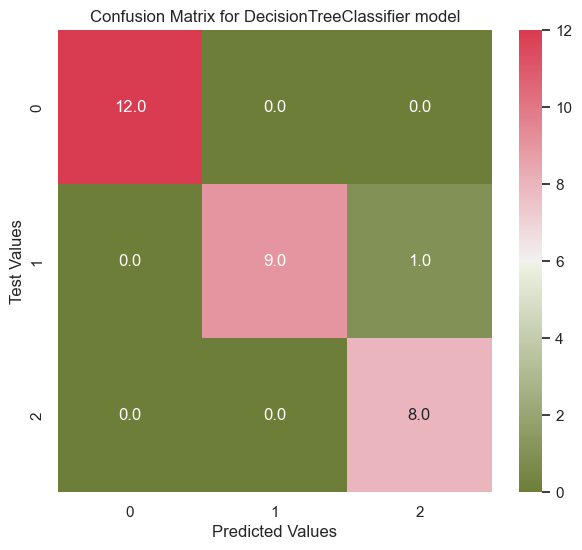

In [50]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
cmap = sns.diverging_palette(100, 8, as_cmap=True)
sns.heatmap(matrix,annot=True,cmap=cmap,fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for DecisionTreeClassifier model")
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc

0.9666666666666667

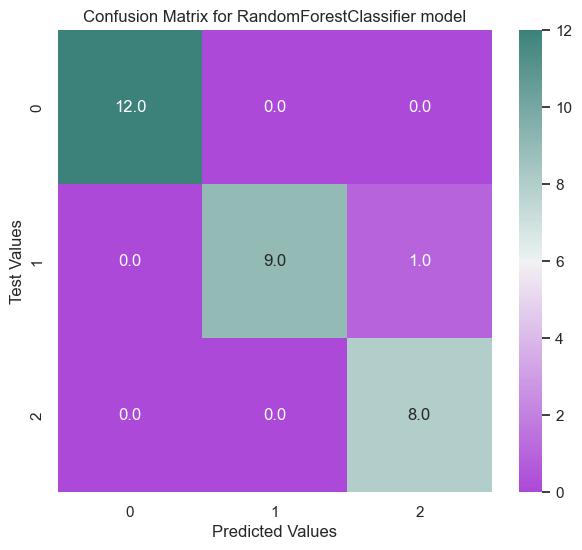

In [52]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
cmap = sns.diverging_palette(650, 180, as_cmap=True)
sns.heatmap(matrix,annot=True,cmap=cmap,fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for RandomForestClassifier model")
plt.show()

In [53]:
model_accuracies = {}

# List of models to evaluate
models = [
    ('GaussianNB', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('KNeighborsClassifier',  KNeighborsClassifier()),
     ('DecisionTreeClassifier',DecisionTreeClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

In [54]:
accuracy_df.style.background_gradient()

,Model,Accuracy
0,GaussianNB,0.966667
1,Support Vector Machine,1.000000
2,KNeighborsClassifier,0.966667
3,DecisionTreeClassifier,0.966667


In [56]:
model = SVC()
model.fit(X_train, y_train)

# Save the model as a pickle file
with open('Iris_Flower.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the saved model
with open('Iris_Flower.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Function for prediction with user input
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    predicted = loaded_model.predict(input_data)[0]
    return predicted

In [60]:
# Example usage
predicted_species = predict_iris(6.7,3.0,2.2,1.3)
print("Predicted Iris Species:", predicted_species)

Predicted Iris Species: 2
